In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
from cycler import cycler

%matplotlib inline

In [144]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': '#b7b7b7',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#64aad4', '#275876', '#ec866c', '#8bccc9', '#f9d669', '#EBA239']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})

In [88]:
df = pd.read_excel("chicago-cases.xlsx", converters={'Date Filed with PB':str,'Primary Charges':str,'PB Hearing Concluded':str,'Date of PB Decision':str,'PB Decision':str})
df.head()

,Case No.,Date Filed with PB,Respondent Last Name,Respondent First Name,Star No.,Rank,CR No.,Date of Incident,Investigated By,Primary Charges,...,PB Hearing Concluded,Date of PB Decision,PB Decision,Suspension ordered,PB Decision Appealed?,Appealed By,Circuit Court Decision,Cir Ct Decision Appealed?,Appealed By.1,Appellate Court Decision
0,2723,2010-03-04 00:00:00,Carter,Aschramm,16084,Police Officer,1014039,2008-02-09 00:00:00,BIA,Conduct Unbecoming--Off Duty,...,2010-07-28 00:00:00,2010-08-19 00:00:00,Not guilty,NaN,No,NaN,NaN,NaN,NaN,NaN
1,2724,2010-03-04 00:00:00,Strong,Robert,13441,Police Officer,1014039,2008-02-09 00:00:00,BIA,Conduct Unbecoming--Off Duty,...,2010-07-28 00:00:00,2010-08-19 00:00:00,Not guilty,NaN,No,NaN,NaN,NaN,NaN,NaN
2,2725,2010-05-12 00:00:00,Howard,Terrance,7312,Police Officer,1017299,2008-06-11 00:00:00,IPRA,Domestic Altercation--Off Duty,...,NaN,2010-08-19 00:00:00,Charges WD (Resigned from CPD),NaN,No,NaN,NaN,NaN,NaN,NaN
3,2726,2010-07-02 00:00:00,Murphy,Brian,19036,Police Officer,311881,2006-03-24 00:00:00,IPRA,Conduct Unbecoming--Off Duty,...,2011-01-04 00:00:00,2011-01-20 00:00:00,"Guilty, Discharged from CPD",NaN,Yes,Respondent,PB decision reversed,Yes,Supt,PB decision upheld
4,2727,2010-07-02 00:00:00,Orsa,Jason,5350,Police Officer,311881,2006-03-24 00:00:00,IPRA,Conduct Unbecoming--Off Duty,...,2011-01-04 00:00:00,2011-01-20 00:00:00,"Guilty, Discharged from CPD",NaN,Yes,Respondent,PB decision reversed,Yes,Supt,PB decision upheld


In [94]:
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], format='%Y-%m-%d %H:%M:%S')
df.head()

ValueError: time data Date of Incident doesn't match format specified

In [65]:
try:
    df['date_of_incident'] = re.findall(r".{4}", df['Date of Incident'])
    print(df['date_of_incident'])
except:
    pass


In [162]:
df['year'] = df['Date Filed with PB'].str.extract("(\w\w\w\w)")
#df.year.dropna(inplace=True)
df.head(2)

,Case No.,Date Filed with PB,Respondent Last Name,Respondent First Name,Star No.,Rank,CR No.,Date of Incident,Investigated By,Primary Charges,...,Date of PB Decision,PB Decision,Suspension ordered,PB Decision Appealed?,Appealed By,Circuit Court Decision,Cir Ct Decision Appealed?,Appealed By.1,Appellate Court Decision,year
0,2723,2010-03-04 00:00:00,Carter,Aschramm,16084,Police Officer,1014039,2008-02-09 00:00:00,BIA,Conduct Unbecoming--Off Duty,...,2010-08-19 00:00:00,Not guilty,NaN,No,NaN,NaN,NaN,NaN,NaN,2010
1,2724,2010-03-04 00:00:00,Strong,Robert,13441,Police Officer,1014039,2008-02-09 00:00:00,BIA,Conduct Unbecoming--Off Duty,...,2010-08-19 00:00:00,Not guilty,NaN,No,NaN,NaN,NaN,NaN,NaN,2010


In [107]:
df_guilty = df[df['PB Decision'].str.contains('Guilty') | df['PB Decision'].str.contains('WD')]

In [137]:
df_guilty.groupby('year')['Primary Charges'].count()

year
2010    10
2011    35
2012    39
2013    16
2014    22
2015    18
2016    18
2017     9
2018     2
Name: Primary Charges, dtype: int64

In [138]:
df_2011=df_guilty[df_guilty.year.str.contains('2011') | df_guilty.year.str.contains('2012') | df_guilty.year.str.contains('2013') | df_guilty.year.str.contains('2014') | df_guilty.year.str.contains('2015')]

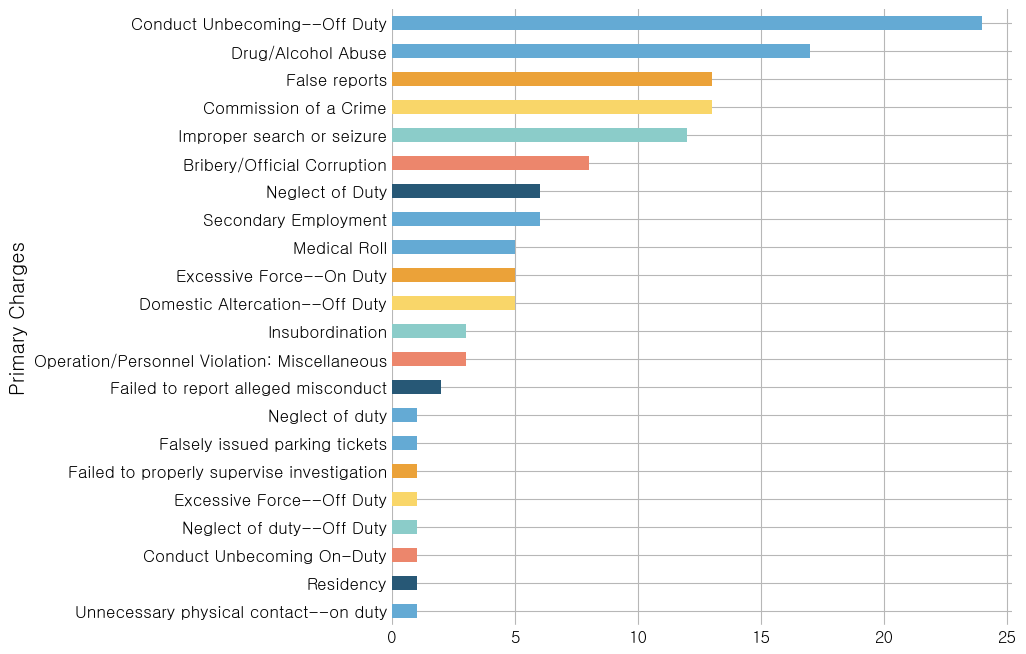

In [163]:
df_2011.groupby(['Primary Charges'])['year'].count().sort_values().plot(kind='barh', figsize=(8, 8),)

In [152]:
df['Primary Charges'].count()

227

In [153]:
df_guilty['Primary Charges'].count()

169

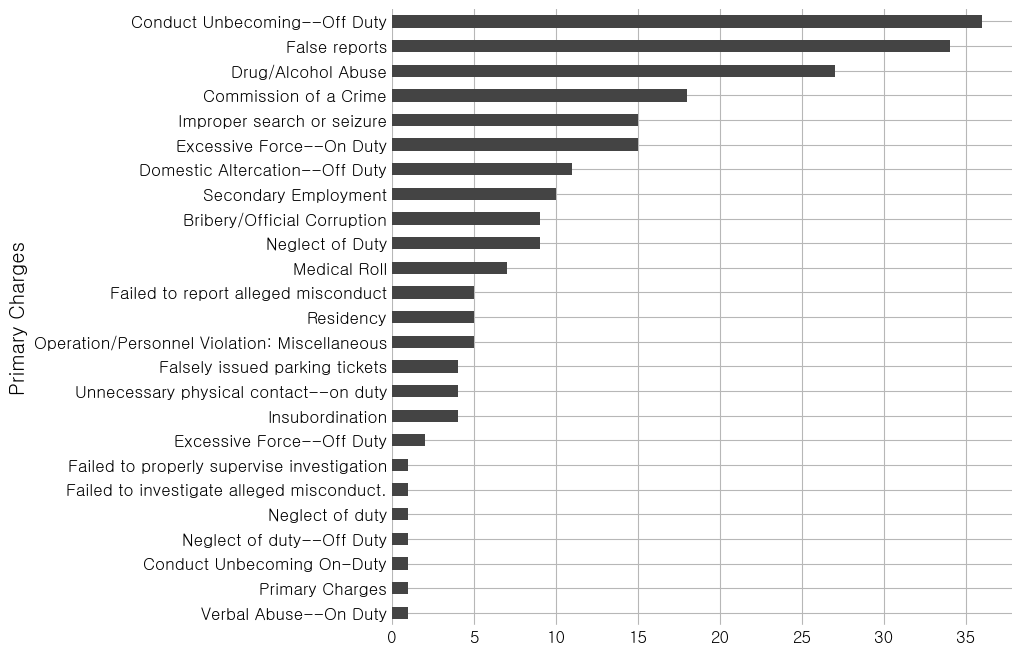

In [168]:
df.groupby(['Primary Charges'])['year'].count().sort_values().plot(kind='barh', figsize=(8,8), color='#444444')

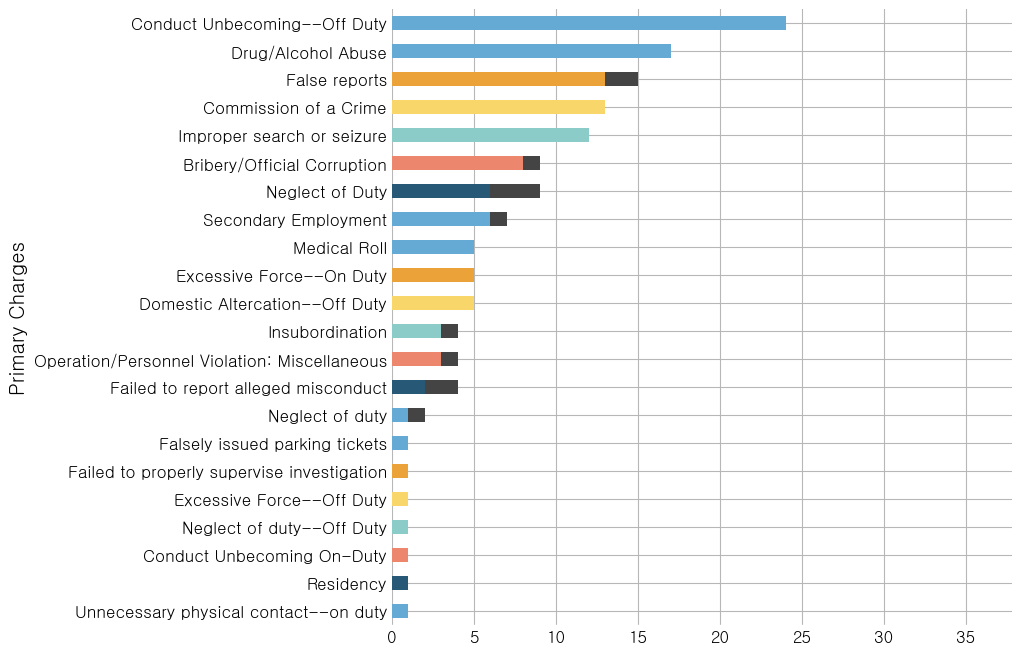

In [172]:
fig, ax = plt.subplots(sharex=True)
p1 = df.groupby(['Primary Charges'])['year'].count().sort_values().plot(kind='barh', figsize=(8,8), color='#444444')
p2 = df_2011.groupby(['Primary Charges'])['year'].count().sort_values().plot(kind='barh', figsize=(8, 8),)
